In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

pd.set_option("display.max_columns", 150)

In [20]:
cd

/Users/pierre


In [21]:
PATH = 'Desktop/Home Credit/jupyter/home_cred/'

In [22]:
application_train = pd.read_csv(PATH+"data/application_train.csv")
application_test = pd.read_csv(PATH+"data/application_test.csv")
bureau = pd.read_csv(PATH+"data/bureau.csv")
bureau_balance = pd.read_csv(PATH+"data/bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"data/credit_card_balance.csv")
installments_payments = pd.read_csv(PATH+"data/installments_payments.csv")
previous_application = pd.read_csv(PATH+"data/previous_application.csv")
POS_CASH_balance = pd.read_csv(PATH+"data/POS_CASH_balance.csv")

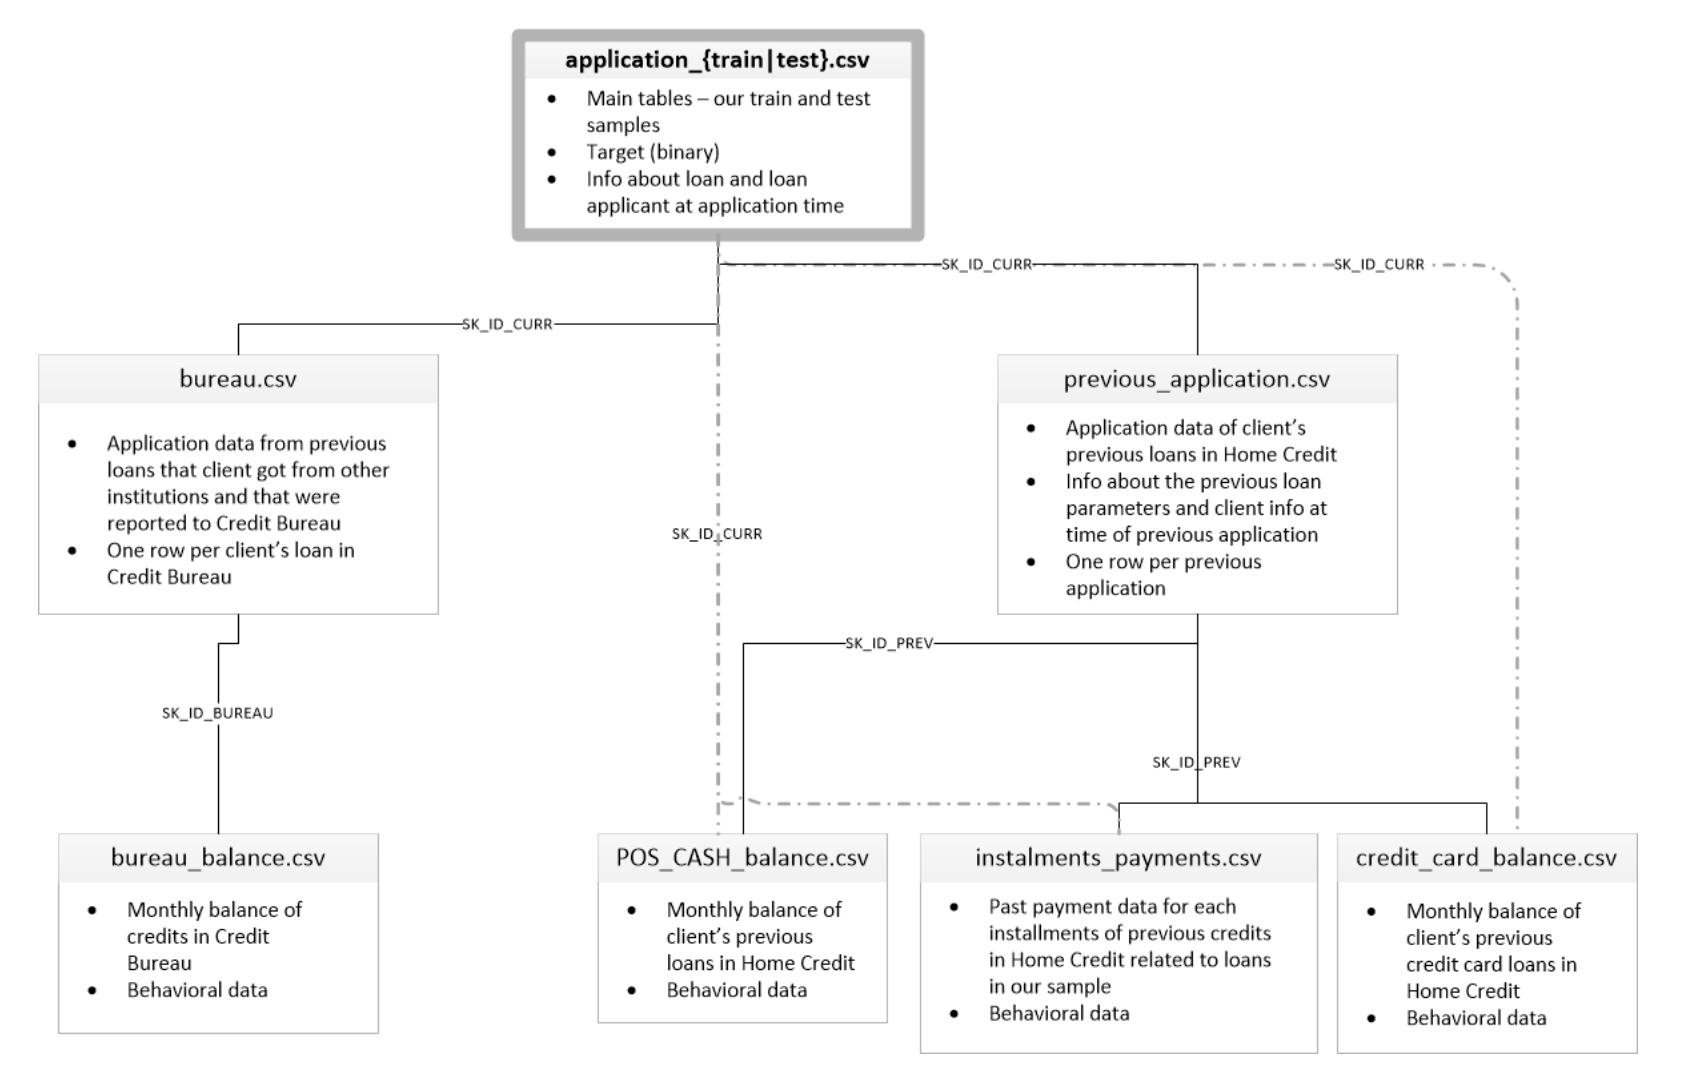

In [23]:
Image(filename=PATH+'other/data_structure.png')

In [24]:
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("application_test -  rows:",application_test.shape[0]," columns:", application_test.shape[1])
print("bureau -  rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_balance -  rows:",bureau_balance.shape[0]," columns:", bureau_balance.shape[1])
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("installments_payments -  rows:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("previous_application -  rows:",previous_application.shape[0]," columns:", previous_application.shape[1])
print("POS_CASH_balance -  rows:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])

application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8


# Bureau Dataset

In [25]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [26]:
bureau.shape

(1716428, 17)

In [27]:
# Max duplicated IDs
bureau['SK_ID_CURR'].value_counts().max()

116

In [28]:
len([x for x in application_train['SK_ID_CURR'] if x in bureau['SK_ID_CURR']]) == application_train.shape[0]

True

In [29]:
len([x for x in application_test['SK_ID_CURR'] if x in bureau['SK_ID_CURR']]) == application_test.shape[0]

True

#### CREDIT_ACTIVE

In [30]:
bureau['CREDIT_ACTIVE'].value_counts(dropna=False)

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [31]:
bureau['active_credit_bureau'] = bureau['CREDIT_ACTIVE'].apply(lambda x: 1 if x == 'Active' else 0)

In [32]:
active_credit_bureau = pd.DataFrame(bureau.groupby('SK_ID_CURR').sum()['active_credit_bureau']).reset_index()
active_credit_bureau.head()

,SK_ID_CURR,active_credit_bureau
0,100001,3
1,100002,2
2,100003,1
3,100004,0
4,100005,2


In [33]:
application_train = application_train.merge(active_credit_bureau, how='left', on='SK_ID_CURR')